Libraries and Dataset


In [50]:
# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dataset
file_path ="final_data_revised.csv"
data = pd.read_csv(file_path)
print(data.head())  # Check if the data is loaded

        Fat  Caloric Value   Protein  Vitamin B2      Zinc  Vitamin B3  \
0  0.525154      -0.545865 -0.783925    0.136054 -0.975762   -0.956376   
1  1.273715       0.494411  0.511160    0.164306  0.429390   -0.715417   
2  0.316654      -0.571698 -0.838223   -1.108980 -1.127832   -1.162341   
3 -0.061433      -0.875474 -0.518231   -0.686236 -0.990749   -1.058034   
4  0.027751      -0.875474 -0.639961   -0.700666 -0.924340   -0.965522   

       Iron  Phosphorus  Vitamin B1  Vitamin B5  Potassium  Magnesium  \
0 -1.036691   -1.357450   -0.534351   -0.897209  -0.880444  -1.494816   
1 -0.988253    0.619481    0.241307    0.408775   0.115237  -0.049408   
2 -1.278404   -1.389491   -1.061099   -1.154499  -1.830420  -1.512822   
3 -0.996220   -1.380782   -0.744215   -1.071604  -0.596099  -1.450942   
4 -1.253168   -0.116291    0.049178   -0.687928  -0.512859  -0.987048   

    Calcium  Vitamin B6 Fat Category  
0 -1.361448   -0.241636    High fats  
1  1.129002   -0.385940    High fats  

Data Preprocessing

In [121]:
# Data Preprocessing

# Handle missing values (if any)
data = data.dropna()

# Separate features and target variable
X = data.drop(columns=['Fat Category'])
y = data['Fat Category']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split Dataset


In [52]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1676 samples
Testing set size: 719 samples


Train Machine Learning Model

In [53]:
# Train Machine Learning Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


Evaluate

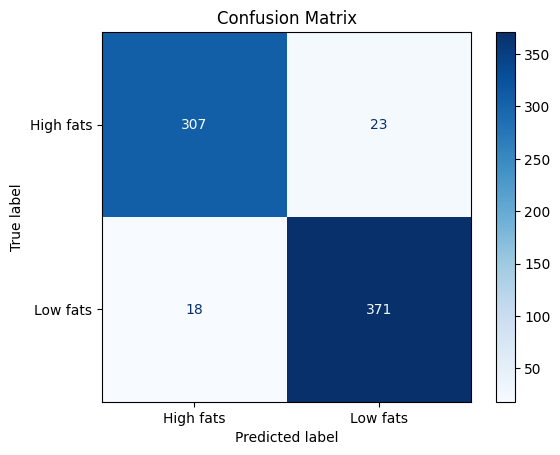

Model Performance:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-Score: 0.94


In [54]:
# Evaluate Model Performance
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Import confusion matrix and display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Save model to pickle


In [55]:
import pickle

# Save the trained model to a file 'mlModel_Revised(2).pkl'
model_filename = "mlModel_Revised(2).pkl"
with open(model_filename, "wb") as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to mlModel_Revised(2).pkl


### Creating Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from distance import DistanceModel
import pickle

In [129]:
real_data = pd.read_csv("FINAL FOOD DATASET/ADDITIONAL/all_group_data.csv")[data.columns[:-1]]
real_data

,Fat,Caloric Value,Protein,Vitamin B2,Zinc,Vitamin B3,Iron,Phosphorus,Vitamin B1,Vitamin B5,Potassium,Magnesium,Calcium,Vitamin B6
0,5.000,51,0.900,0.097,0.039,0.084,0.082,0.091,0.033,0.052,15.5,0.027,0.008,0.096
1,19.400,215,7.800,0.100,0.700,0.200,0.100,117.300,0.099,0.500,129.2,8.500,99.500,0.078
2,3.600,49,0.800,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000
3,2.000,30,1.500,0.027,0.035,0.041,0.097,0.024,0.019,0.016,30.8,0.096,0.097,0.007
4,2.300,30,1.200,0.026,0.053,0.080,0.008,22.800,0.080,0.100,37.1,1.200,22.200,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,0.095,25,0.500,0.200,0.700,0.012,0.600,13.900,0.002,2.000,42.6,24.800,15.800,0.082
2391,0.099,1,0.062,0.000,0.096,0.021,0.099,0.015,0.000,0.200,3.2,0.034,0.000,0.000
2392,0.070,4,0.400,0.000,0.069,0.008,0.056,0.060,0.000,0.300,25.0,1.600,0.000,0.028
2393,0.300,19,1.800,0.100,0.500,3.900,0.300,92.900,0.064,1.000,313.0,0.000,2.600,0.100


In [ ]:
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformer.fit(real_data)

PowerTransformer()

In [131]:
transformer = Pipeline([
    ("power_transformer", power_transformer),
    ("standard_scaler", scaler)
])

pipeline_filename = "transformer.pkl"
with open(pipeline_filename, "wb") as file:
    pickle.dump(transformer, file)
print(f"Pipeline saved to {pipeline_filename}")

Pipeline saved to transformer.pkl
